## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
!pip install catboost

Could not fetch URL https://pypi.org/simple/catboost/: There was a problem confirming the ssl certificate: HTTPSConnectionPool(host='pypi.org', port=443): Max retries exceeded with url: /simple/catboost/ (Caused by SSLError("Can't connect to HTTPS URL because the SSL module is not available.")) - skipping


ERROR: Could not find a version that satisfies the requirement catboost
ERROR: No matching distribution found for catboost


In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
#from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

ModuleNotFoundError: No module named 'catboost'

#### Import the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [6]:
df.head()

,gender,race_ethnicity,parental_level,lunch,test_preparation,math_score,reading_score,writing_score
0,Male,Group A,Bachelor's Degree,Standard,Completed,78,85,82
1,Female,Group B,Some College,Free/Reduced,None,62,72,70
2,Male,Group C,Master's Degree,Standard,None,90,88,85
3,Female,Group D,Associate Degree,Free/Reduced,Completed,68,75,74
4,Male,Group A,High School,Standard,None,72,80,77


#### Preparing X and Y variables

In [7]:
X = df.drop(columns=['math_score'],axis=1)

In [8]:
X.head()

,gender,race_ethnicity,parental_level,lunch,test_preparation,reading_score,writing_score
0,Male,Group A,Bachelor's Degree,Standard,Completed,85,82
1,Female,Group B,Some College,Free/Reduced,None,72,70
2,Male,Group C,Master's Degree,Standard,None,88,85
3,Female,Group D,Associate Degree,Free/Reduced,Completed,75,74
4,Male,Group A,High School,Standard,None,80,77


In [9]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation'].unique())

Categories in 'gender' variable:      ['Male' 'Female']
Categories in 'race_ethnicity' variable:   ['Group A' 'Group B' 'Group C' 'Group D']
Categories in'parental level of education' variable: ["Bachelor's Degree" 'Some College' "Master's Degree" 'Associate Degree'
 'High School']
Categories in 'lunch' variable:      ['Standard' 'Free/Reduced']
Categories in 'test preparation course' variable:      ['Completed' 'None']


In [10]:
y = df['math_score']

In [11]:
y

0      78
1      62
2      90
3      68
4      72
       ..
438    62
439    85
440    68
441    72
442    88
Name: math_score, Length: 443, dtype: int64

In [12]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(443, 17)

In [15]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((354, 17), (89, 17))

#### Create an Evaluate Function to give all metrics after model Training

In [16]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [18]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.9022
- Mean Absolute Error: 0.5906
- R2 Score: 0.9921
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9743
- Mean Absolute Error: 0.6545
- R2 Score: 0.9910


Lasso
Model performance for Training set
- Root Mean Squared Error: 1.4379
- Mean Absolute Error: 1.0391
- R2 Score: 0.9800
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 1.2534
- Mean Absolute Error: 0.9757
- R2 Score: 0.9851


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.9090
- Mean Absolute Error: 0.5925
- R2 Score: 0.9920
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.9725
- Mean Absolute Error: 0.6546
- R2 Score: 0.9911


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 1.3138
- Mean Absolute Error: 0.3616
- R2 Score: 0.9833
-----------------------

### Results

In [19]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
5,Random Forest Regressor,0.995344
2,Ridge,0.991057
0,Linear Regression,0.991023
4,Decision Tree,0.989056
1,Lasso,0.985143
6,AdaBoost Regressor,0.978106
3,K-Neighbors Regressor,0.974532


## Linear Regression

In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 99.10


## Plot y_pred and y_test

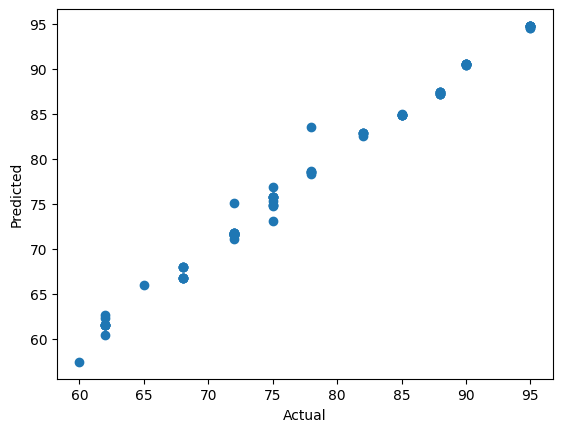

In [21]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

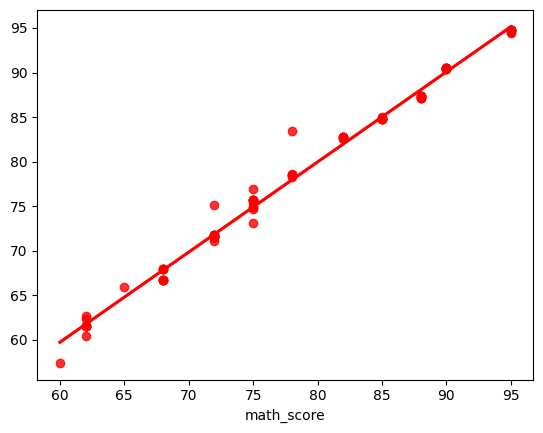

In [22]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [23]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
333,95,94.734375,0.265625
137,90,90.484375,-0.484375
72,88,87.363281,0.636719
364,72,71.734375,0.265625
73,95,94.734375,0.265625
...,...,...,...
101,72,71.582031,0.417969
90,68,66.683594,1.316406
57,62,60.398438,1.601562
148,62,61.531250,0.468750
